# Seminar 2

## 1. Numerical integration errors
We have a function
$$f(x) = \frac{1}{1+25 x^2}$$
for $x \in [-1, 1]$.

The integral of $f(x)$ is $(2 \arctan(5))/5$. Compute the integral of $f(x)$ over the interval $[-1,1]$ for different $h$ and compare with the exact answer.


Calculate the interpolation error as the number of points increases (or the grid resolution $h$ decreases). 
How does the interpolation error depend on the grid resolution (what is the order of convergence)? Plot this dependence on a logarithmic scale and comment on the results.

In [97]:
import numpy as np
import numpy.linalg as lin
import scipy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


In [98]:
def f_true(x):
    return 1/(1 + 25*x**2)

In [99]:
a, b = (-1, 1)
true_val = 2 * np.arctan(5) / 5

true_val

0.5493603067780064

### Integration methods

Left-point rectangles        |  Middle-point rectangles        |  Right-point rectangles
:---------------------------:|:-------------------------------:|:-------------------------:
![](fig/int_rect_left.png)   |  ![](fig/int_rect_middle.png)   |  ![](fig/int_rect_right.png)

 ![](fig/int_trap.png)

#### Q: Which method(s) is(are) more accurate?  Why?

In [100]:
# f - func to integrate
# n - number of segments on [a, b]

def int_rect_left(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*i) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value

def int_rect_right(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*(i+1)) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


def int_rect_middle(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*(i+0.5)) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


def int_trap(f, n):
    h = (b - a) / n
    y_grid = np.array([
        (f(a + h*i) + f(a + h*(i+1))) / 2
                      for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value

In [101]:
int_methods = [
    int_rect_left,    
    int_rect_right,
    int_rect_middle,
    int_trap,
]

int_rect_left   E = 0.26875 * h^2.19786
int_rect_right  E = 0.26875 * h^2.19786
int_rect_middle E = 0.36360 * h^2.50694
int_trap        E = 0.26875 * h^2.19786


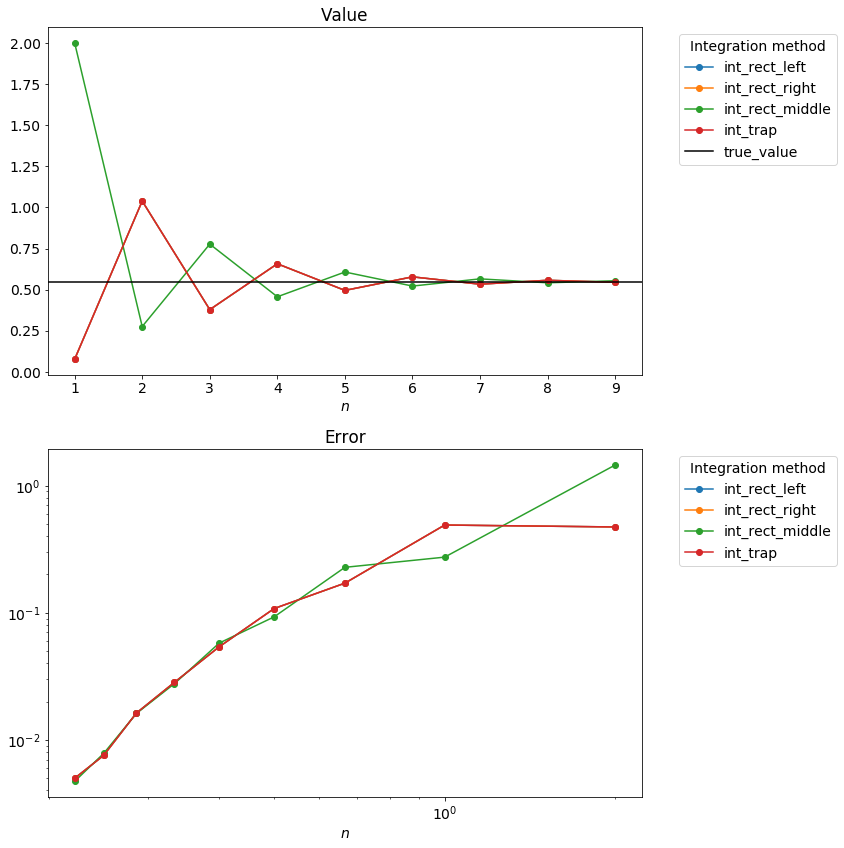

In [102]:
# Try ranges: (1, 10, 1), (1, 30, 1), (10, 30, 1)

n_grid = range(1, 10, 1)
h_grid = [(b-a)/n for n in n_grid]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axes[0].set_title("Value")
axes[1].set_title("Error")


for int_method in int_methods:
    int_vals = np.array([int_method(f_true, n) for n in n_grid])
    axes[0].plot(n_grid, int_vals, label=int_method.__name__, marker="o")
    
    err_vals = np.abs(int_vals - true_val)
    axes[1].plot(h_grid, err_vals, label=int_method.__name__, marker="o")

    poly_coeffs = np.polyfit(np.log(h_grid), np.log(err_vals), 1)
    print(f"{int_method.__name__:15} E = {np.exp(poly_coeffs[1]):.5f} * h^{poly_coeffs[0]:.5f}")


axes[0].axhline(true_val, label="true_value", color="black")
axes[0].set_xlabel("$n$")

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("$n$")

for axe in axes:
    axe.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Integration method")

fig.tight_layout() 
plt.show()

#### Q: Why results of integration are the same for different methods?

In [103]:
# non-symmetric function
a, b = (0, 1)
true_val = 2 * np.arctan(5) / 5 / 2

true_val

0.2746801533890032

int_rect_left   E = 0.67771 * h^1.18373
int_rect_right  E = 0.27919 * h^0.70366
int_rect_middle E = 0.56569 * h^4.40841
int_trap        E = 0.65485 * h^4.34574


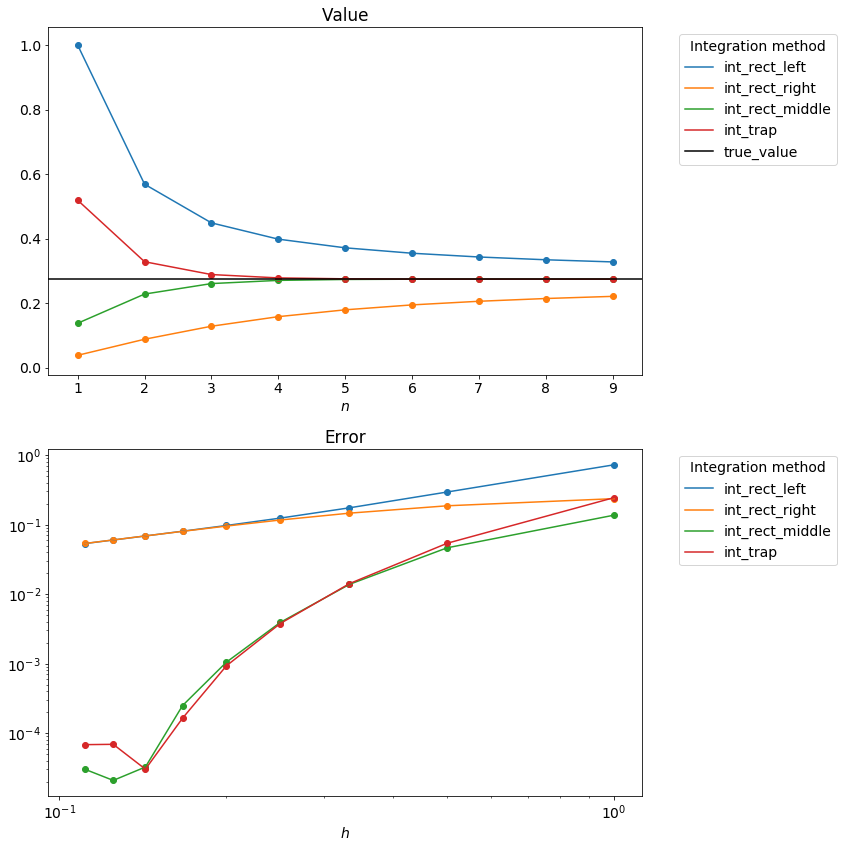

In [104]:
# Try ranges: (1, 10, 1), (1, 30, 1), (10, 30, 1), (30, 1000, 30)
# add int_rect_middle back

n_grid = range(1, 10, 1)
h_grid = [(b-a)/n for n in n_grid]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axes[0].set_title("Value")
axes[1].set_title("Error")


for int_method in int_methods:
    int_vals = np.array([int_method(f_true, n) for n in n_grid])
    axes[0].plot(n_grid, int_vals, label=int_method.__name__)
    axes[0].scatter(n_grid, int_vals)
    
    err_vals = np.abs(int_vals - true_val)
    axes[1].plot(h_grid, err_vals, label=int_method.__name__)
    axes[1].scatter(h_grid, err_vals)  

    poly_coeffs = np.polyfit(np.log(h_grid), np.log(err_vals), 1)
    print(f"{int_method.__name__:15} E = {np.exp(poly_coeffs[1]):.5f} * h^{poly_coeffs[0]:.5f}")


axes[0].axhline(true_val, label="true_value", color="black")
axes[0].set_xlabel("$n$")

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("$h$")

for axe in axes:
    axe.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Integration method")

fig.tight_layout() 
plt.show()

## 2. Errors of polynomial interpolation

In [105]:
import numpy as np
import numpy.linalg as lin
import scipy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


In [106]:
def f_true(x):
    return 1/(1 + 25*x**2)

In [107]:
a, b = (-1, 1)

def uniform_grid(n):
    return np.linspace(a, b, n)


def chebyshev_grid(n):
    k = np.arange(1, n+1)
    return np.cos((2*k-1)/(2*n) * np.pi)


def rmse(x, y):
    return np.sqrt(np.sum(np.mean((x - y)**2)))


x_dense_grid = uniform_grid(569)

## Polinomial interpolation

In [108]:
def coeff_mat(x_grid, n):
    X = np.array([[x**(n-i) for i in range(0, n+1)] for x in x_grid])
    return X


# pseudoinverse
def psinv(A):
    if (A.shape[0] == A.shape[1]):
        return lin.inv(A)
    return lin.inv(A.T @ A) @ A.T


def polyfit(x_grid, y_grid, n):
    assert(x_grid.shape == y_grid.shape)
    
    X = coeff_mat(x_grid, n)
    
    # think about stability
    X_psinv = psinv(X)
    coeffs = X_psinv @ y_grid
    
    return coeffs
    

### Uniform grid

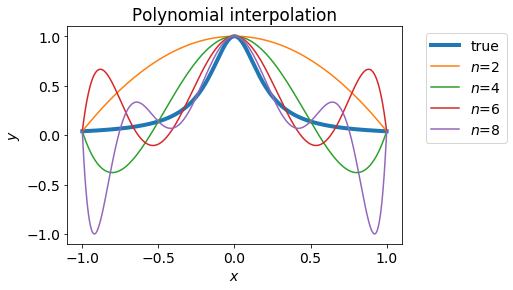

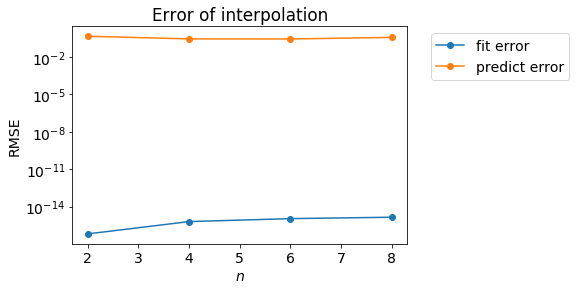

In [109]:
n_grid = range(2, 10, 2)

# Ground truth
plt.plot(x_dense_grid, f_true(x_dense_grid), label="true", linewidth=4)

rmse_fit_errors = []
rmse_predict_errors = []

# Interpolations
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = f_true(x_grid)

    poly_coeffs = polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    y_fit = poly(x_grid)
    rmse_fit_errors.append(rmse(y_fit, y_grid))

    y_predict = poly(x_dense_grid)
    rmse_predict_errors.append(rmse(y_predict, f_true(x_dense_grid)))

    plt.plot(x_dense_grid, poly(x_dense_grid), label=f"$n$={n}")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()

plt.plot(n_grid, rmse_fit_errors, label="fit error", marker='o')
plt.plot(n_grid, rmse_predict_errors, label="predict error", marker='o')

plt.xlabel("$n$")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Error of interpolation")
plt.show()


### Chebyshev grid

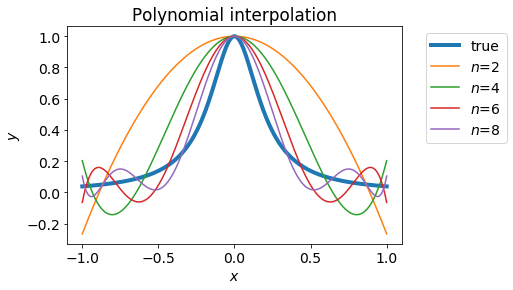

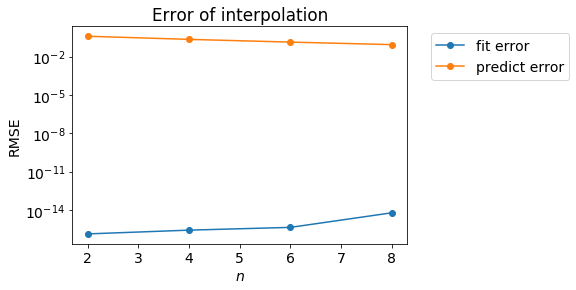

In [110]:
# Try range(2, 80, 10)
n_grid = range(2, 10, 2)

# Ground truth
plt.plot(x_dense_grid, f_true(x_dense_grid), label="true", linewidth=4)

rmse_fit_errors = []
rmse_predict_errors = []

# Interpolations
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = f_true(x_grid)

    poly_coeffs = polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    y_fit = poly(x_grid)
    rmse_fit_errors.append(rmse(y_fit, y_grid))

    y_predict = poly(x_dense_grid)
    rmse_predict_errors.append(rmse(y_predict, f_true(x_dense_grid)))

    plt.plot(x_dense_grid, poly(x_dense_grid), label=f"$n$={n}")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()

plt.plot(n_grid, rmse_fit_errors, label="fit error", marker='o')
plt.plot(n_grid, rmse_predict_errors, label="predict error", marker='o')

plt.xlabel("$n$")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Error of interpolation")
plt.show()


### Condition number convergence

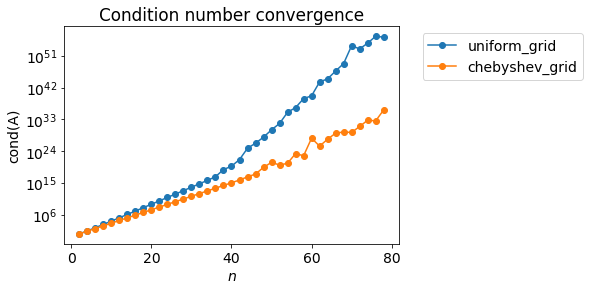

In [111]:
n_grid = range(2, 80, 2)

grid_gens = [uniform_grid, chebyshev_grid]

for grid_gen in grid_gens:   
    X_grid = [coeff_mat(grid_gen(n+1), n) for n in n_grid]
    cond_nums = [lin.cond(psinv(X)) for X in X_grid]
    
    plt.plot(n_grid, cond_nums, label=grid_gen.__name__, marker="o")

plt.xlabel("$n$")
plt.ylabel("cond(A)")
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Condition number convergence")
plt.show()

### Intergration using polynomials

In [112]:
def int_poly_uni(f, n):
    x_grid = uniform_grid(n+1)
    y_grid = f_true(x_grid)

    poly_coeffs = polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    poly_int = np.polyint(poly)
    int_value = poly_int(b) - poly_int(a)
    return int_value


def int_poly_cheb(f, n):
    x_grid = chebyshev_grid(n+1)
    y_grid = f_true(x_grid)

    poly_coeffs = polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    poly_int = np.polyint(poly)
    int_value = poly_int(b) - poly_int(a)
    return int_value



In [113]:
int_methods = [
    int_poly_uni,
    int_poly_cheb,
]

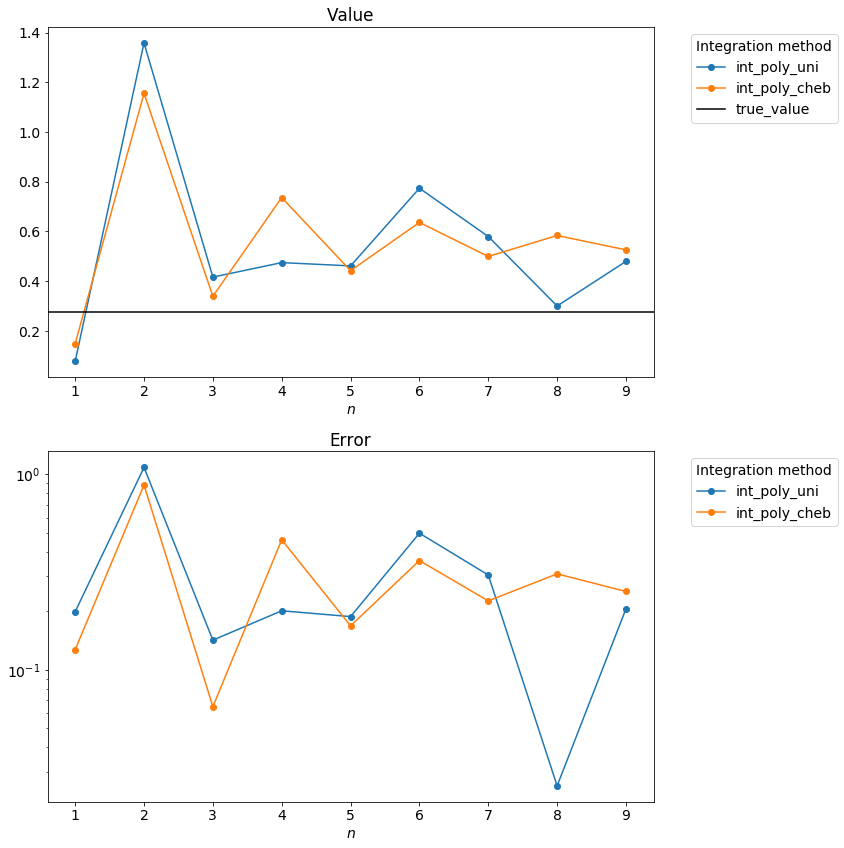

In [114]:
# Try ranges: (1, 80,2)

n_grid = range(1, 10, 1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axes[0].set_title("Value")
axes[1].set_title("Error")


for int_method in int_methods:
    int_vals = np.array([int_method(f_true, n) for n in n_grid])
    axes[0].plot(n_grid, int_vals, label=int_method.__name__, marker="o")
    
    err_vals = np.abs(int_vals - true_val)
    axes[1].plot(n_grid, err_vals, label=int_method.__name__, marker="o")


axes[0].axhline(true_val, label="true_value", color="black")
axes[0].set_xlabel("$n$")

# axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("$n$")

for axe in axes:
    axe.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Integration method")

fig.tight_layout() 
plt.show()